In [1]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [2]:
#Bibliotecas
import PIL
import cv2
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

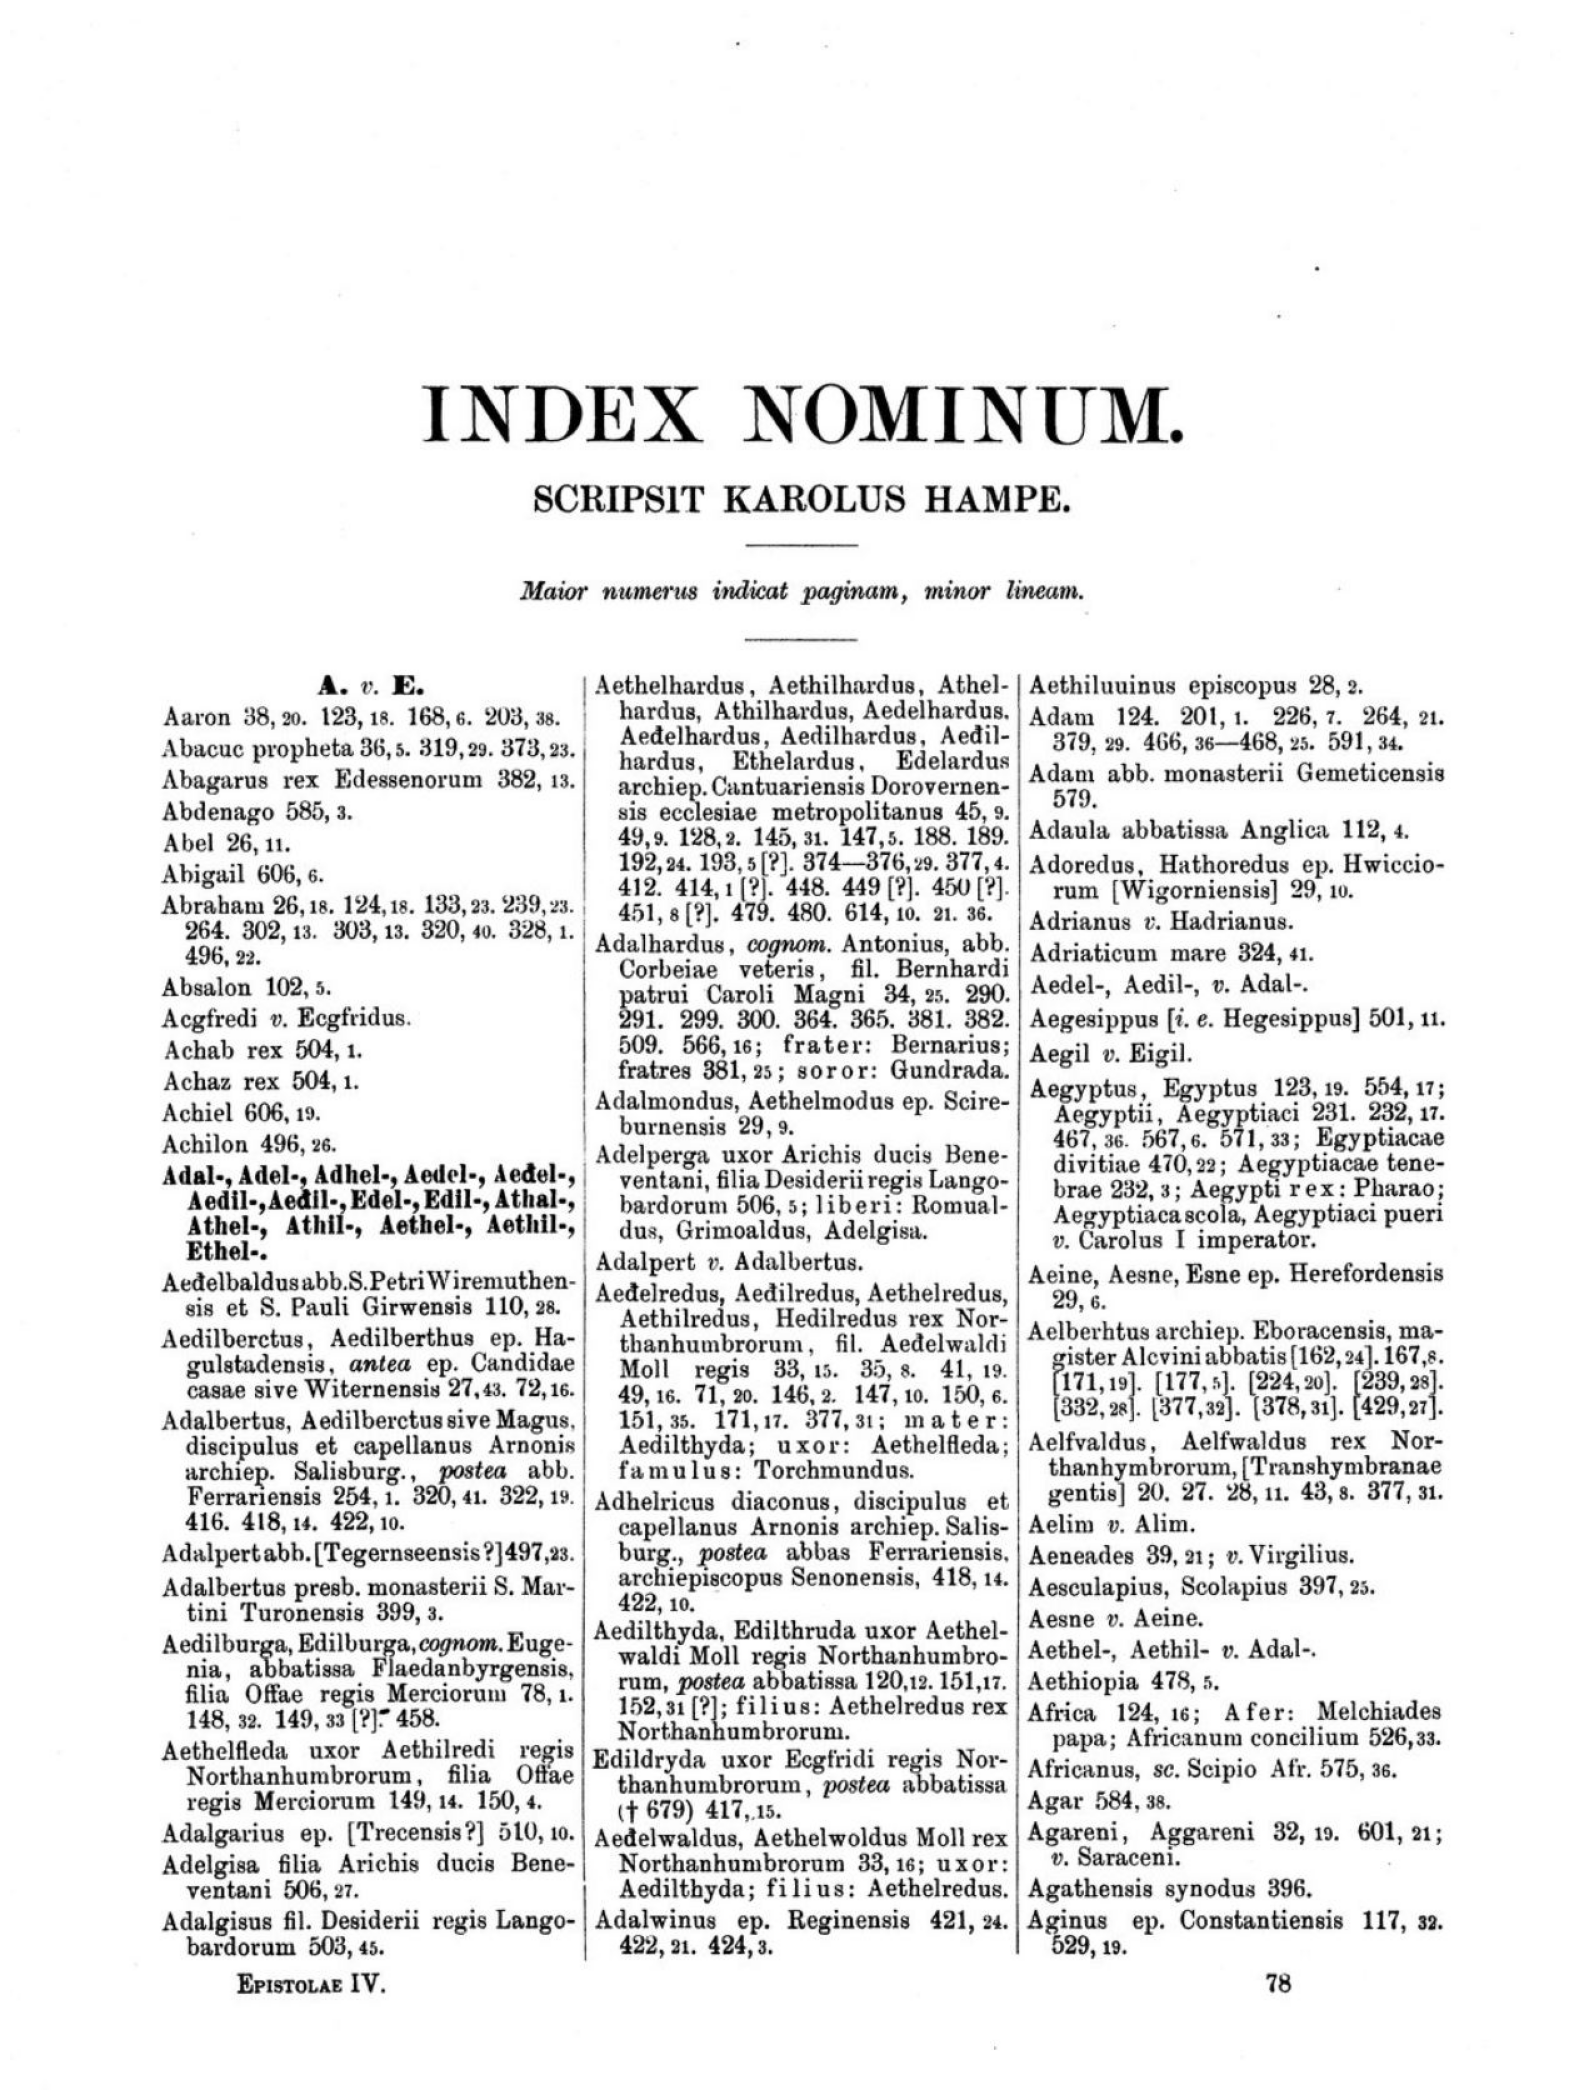

In [3]:
#Carregando as imanges
image_file = '../datasets/ocr/index_02.jpg'
img = Image.open(image_file)
display(image_file)

In [4]:
#tentando reconhecer os caracteres sem tratar a imagem
ocr_result = pytesseract.image_to_string(img)

In [5]:
print(ocr_result)
#pytesseract não consegue identificar corretamente o documento, não entende que se trata de colunas

INDEX NOMINUM.

SCRIPSIT KAROLUS HAMPE.

Maior numerus indicat paginam, minor lineam.

A. v. E.

Aaron 38, 20. 123, 18. 168, 6. 203, 38. |

Abacuc propheta 36,5. 319,29. 373, 23.
Abagarus rex Edessenorum 382, 13.
Abdenago 585, 3.

Abel 26, 11.

Abigail 606, 6.

Abraham 26,18. 124,18. 133, 23. 2:
264. 302, 13. 303, 13. 320, 40. 328, 1.
496, 22.

Absalon 102, 5.

Acgfredi v. Ecgfridus.

Achab rex 504, 1.

Achaz rex 504,1.

Achiel 606, 19.

Achilon 496, 26.

Adal-, Adel-, Adhel-, Aedel-, Aedel-,
‘Aedil-, Aed
Athel-, Athil-, Aethel-, Aethil-,
Ethel-.

Aedelbaldusabb.S. Petri Wiremuthen-
sis et S. Pauli Girwensis 110, 28.

Aedilberctus, Aedilberthus ep. Ha-
gulstadensis, antea ep. Candidae
casae sive Witernensis 27,43. 72,16.

Adalbertus, Aedilberctus sive Magus,
discipulus et capellanus Arnonis
archiep. Salisburg., postea_abb.
Ferrariensis 254, 1. 320, 41. 322, 19.
416. 418, 14. 422, 10.

Adalpertabb. [Tegernseensis ?]497,23.

Adalbertus presb. monasterii 8. Mar-
tini Turonensis 399, 3.

A

In [6]:
#Bounding boxes das imagens
image = cv2.imread('../datasets/ocr/index_02.jpg')
base_image = image.copy()

In [7]:
#preprocessando a imagem para conseguir identificar as estruturas da imagem

#escala de cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('data-processed/index_gray.jpg', gray)

##Blur
blur = cv2.GaussianBlur(gray, (7,7), 0)
cv2.imwrite('data-processed/index_blur.jpg', blur)


#Threshold
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cv2.imwrite('data-processed/index_thresh.jpg', thresh)

#dilatação
kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3,13)) #pegando o kernal da image
cv2.imwrite('data-processed/index_kernal.jpg', kernal)
dilate = cv2.dilate(thresh, kernal, iterations=1)
cv2.imwrite('data-processed/index_thresh.jpg', dilate)

True

In [8]:
#Criando os contornos
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cents[1]
#Organizando os contornos da esquerna para direita
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])

In [9]:
results = []
#iterando todos os contornos encontrados
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    #eliminando os contornos muito pequenas, são falsos positivos
    if h > 200 and w > 20:
        #roi = cada bounxing boxe individualmente
        roi = image[y:y+h, x:x+h]
        #desenhando o bounding boxe na imagem
        cv2.rectangle(image, (x,y), (x+w, y+h), (36,255,12), 2)
        #tentando reconhecer os caracteres de cada bounding boxe
        ocr_result = pytesseract.image_to_string(roi)
        #separando cada linha da identificação
        ocr_result = ocr_result.split('\n')
        for item in ocr_result:
            results.append(item)
        print(ocr_result)
cv2.imwrite('data-processed/index_bbox.jpg', image)

['A. v. E.', '', 'Aaron 38, 20. 123, 18. 168, 6. 203, 38.', '', 'Abacuc propheta 36,5. 319, 29. 373, 23.', '', 'Abagarus rex Edessenorum 382, 13.', '', 'Abdenago 585, 3.', '', 'Abel 26, 11.', '', 'Abigail 606, 6.', '', 'Abraham 26,18. 124,18. 133, 23.', '', '264. 302, 13. 303, 13. 320, 40.', '', '496, 22.', '', 'Absalon 102, 5.', '', 'Acgfredi v. Ecgtridus.', '', 'Achab rex 504, 1.', '', 'Achaz rex 504,1.', '', 'Achiel 606, 19.', '', 'Achilon 496, 26.', '', 'Adal-, Adel-, Adhel-, Aedel-, Aedel-,', '', 'Aedil-, Aedil- Edel-, Edil-, Athal-,', '', 'Athel-, Athil-, Aethel-, Aethil-,', '', 'Ethel-.', '', 'Aedelbaldusabb.S. Petri Wiremuthen-', '', 'sis et S. Pauli Girwensis 110, 28.', '', 'Aedilberctus, Aedilberthus ep. Ha-', '', 'gulstadensis, antea ep. Candidae|', '', 'casae sive Witernensis 27,43. 72,16.', '', 'Adalbertus, Aedilberctus sive Magus,', '', 'discipulus et capellanus Arnonis)', '', 'archiep. Salisburg., postea_abb.', '', 'Ferrariensis 254, 1. 320, 41. 322, 19.)', '', '416. 418

['Aethiluuinus episcopus 28, 2.', '', 'Adam 124. 201,1. 226,7. 264, 21,]', '', '379, 29. 466, 36-—468, v5. 591, 34.', '', 'Adam abb. monasterii Gemeticensis', '', '579.', '', 'Adaula abbatissa Anglica 112, 4.', '', 'Adoredus, Hathoredus ep. Hwiccio-|', 'rum [Wigorniensis] 29, 10.', '', 'Adrianus v. Hadrianus.', '', 'Adriaticum mare 324, 41.', '', 'Aedel-, Aedil-, v. Adal-.', '', 'Aegesippus [i. e. Hegesippus] 501, 11,', '', 'Aegil v. Eigil.', '', 'Aegyptus, Egyptus 123,19. 554, 17;', '‘Aegyptii, Aegyptiaci 231. 232, 17,', '467, 36. 567,6. 571,33; Egyptiacae’', 'divitiae 470, 22; Aegyptiacae tene-|', 'brae 232, 3; Aegyptt rex: Pharao;', 'Aegyptiacascola, Aegyptiaci pueri', 'v. Carolus I imperator.', '', 'Aeine, Aesne, Esne ep. Herefordensis’', '', ', 6.', 'Aelberhtus archiep. Eboracensis, ma-', '‘ister Alcvini abbatis (162, 24]. 167,s.', '171,19]. [177,5]. [224,20]. [239, 28].', '332, 28]. [377,32]. (378, 31]. [429, 27].)', '', 'Aelfvaldus, Aelfwaldus rex Nor-', 'thanhymbrorum, [Transhy

True

In [10]:
#Selecionando somente os nomes do documentos
entities = []
#iterando pelos resultados - preprocessando os resultados
for item in results:
    item = item.strip().replace('\n', '')
    item = item.split(' ')[0]
    if len(item) > 2:
        if item[0].isupper() and item[0] == 'A' and '-' not in item:
            item = item.split('.')[0].replace(',','').replace(';','')
            entities.append(item)

In [11]:
entities = set(entities)

In [12]:
print(entities)

{'Agar', 'Adalhardus', 'Aedilberctus', 'Aethelfleda', 'Adalgisus', 'Africa', 'Aethiluuinus', 'Aedilburga', 'Abraham', 'Aelim', 'Africanus', 'Adalbertus', 'Aethilredus', 'Adalwinus', 'Adelperga', 'Aesne', 'Aethelhardus', 'Abigail', 'Aedelwaldus', 'Aegil', 'Aginus', 'Agathensis', 'Adalpertabb', 'Adhelricus', 'Aegyptus', 'Adalmondus', 'Acgfredi', 'Adaula', 'Adrianus', 'Aaron', 'Aethiopia', 'Adriaticum', 'Abagarus', 'Adam', 'Absalon', 'Abacuc', 'Aesculapius', 'Adalgarius', 'Achilon', 'Adelgisa', 'Abdenago', 'Aedelbaldusabb', 'Achab', 'Aegesippus', 'Aelberhtus', 'Aedelredus', 'Achiel', 'Adalpert', 'Aelfvaldus', 'Aeneades', 'Adoredus', 'Aedilthyda', 'Aegyptiacascola', 'Aedelhardus', 'Agareni', 'Achaz', 'Abel', 'Aeine'}
